# Project - Python For Data Analysis

---

## Avila Dataset
### By Kevin Gomes

## Requirements
Import libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Import Dataset

In [25]:
columns = [
    'intercolumnar distance',
    'upper margin',
    'lower margin',
    'exploitation',
    'row number',
    'modular ratio',
    'interlinear spacing',
    'weight',
    'peak number',
    'modular ratio/ interlinear spacing',
    'monk'
]

train = pd.read_csv('avila/avila-tr.csv', names=columns)
test = pd.read_csv('avila/avila-ts.csv', names=columns)

In [26]:
train.head(10)

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,monk
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
5,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A
6,0.389513,-0.220579,-3.210528,-2.624155,0.261718,-0.764757,0.484429,-0.597510,-0.372457,-0.810261,A
7,0.019197,-0.040001,0.288973,-0.042597,0.261718,-1.013906,0.069175,0.890701,0.095265,-0.842014,F
8,0.500607,0.140576,0.388552,-0.637358,0.261718,-0.681707,0.295677,0.931046,0.500624,-0.642297,H
9,-0.252367,0.069915,0.246296,0.523550,0.261718,-1.221530,0.899684,1.373076,0.625350,-1.400890,E


## Data-visualization

The first thing to do is to check if we have null values

In [27]:
print('Null values per attribute:')
print(np.sum(train.isna()))

Null values per attribute:
intercolumnar distance                0
upper margin                          0
lower margin                          0
exploitation                          0
row number                            0
modular ratio                         0
interlinear spacing                   0
weight                                0
peak number                           0
modular ratio/ interlinear spacing    0
monk                                  0
dtype: int64


The dataset contains no null values, so we can pass to the next step which is examinate the class proportions

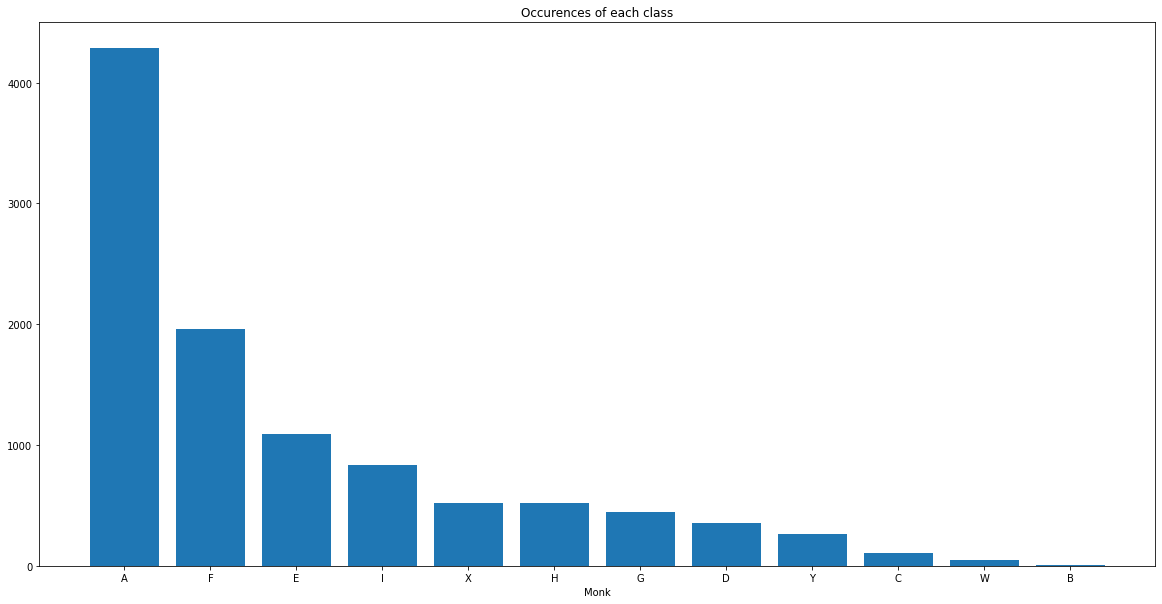

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))

x = train['monk'].value_counts().index
y = train['monk'].value_counts()

ax.bar(x, y)
ax.set_xlabel('Monk')
ax.set_title('Occurences of each class')
plt.show()

We can easily observe that the class distribution is not balanced.

We're now going to use correlation matrix to see if we have some high correlated attributes. If so, it's better to remove one of the two to avoid problems.

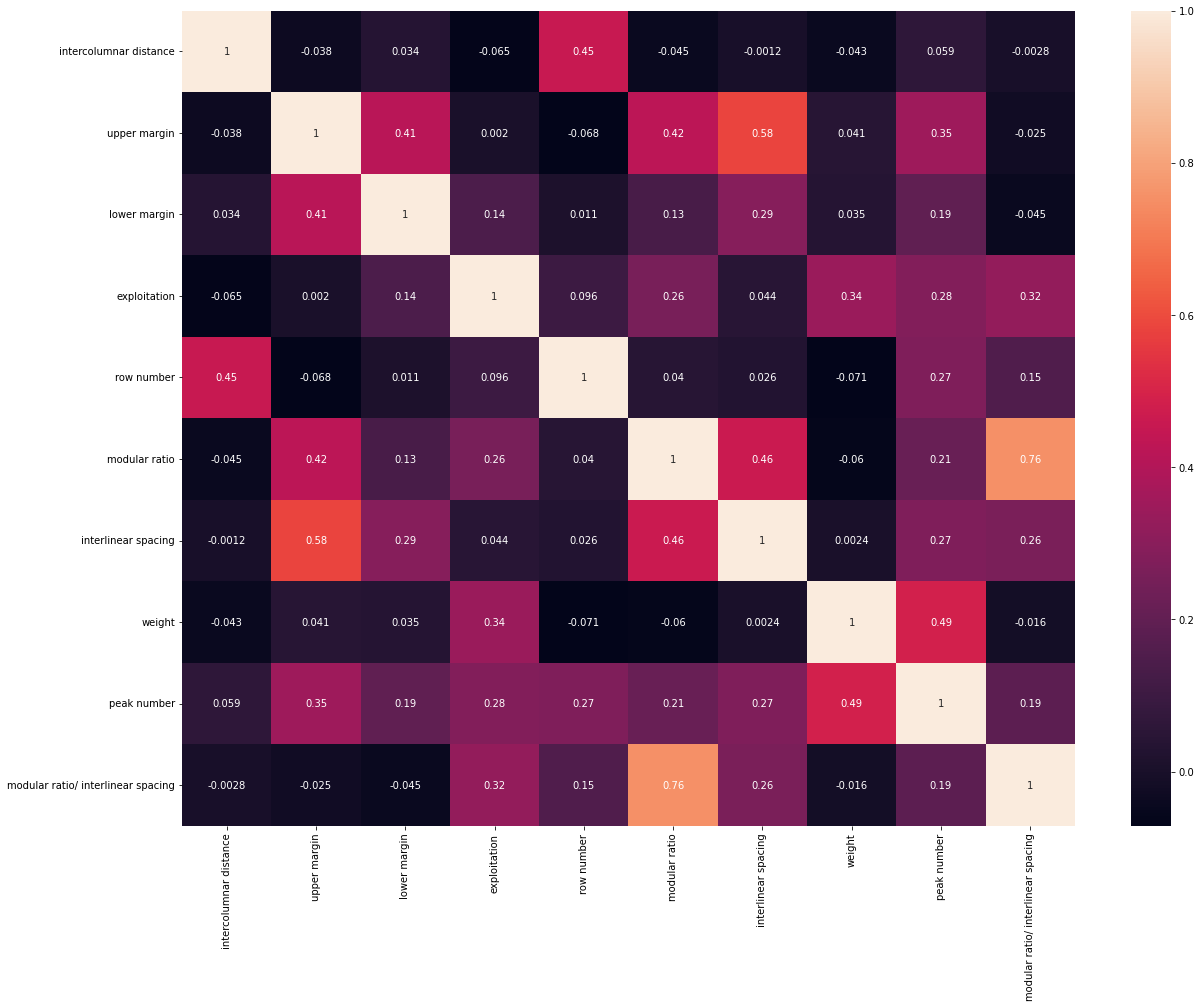

In [29]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

This correlation matrix show a high correlation between `modular ratio` and `modular ratio / interlinear spacing` (0.76). This correlation is logic because one is only the other divided by interlinear spacing. This correlation can be misleading so we're going to remove `modular ratio / interlinear spacing` from our dataset.

We have also two high correlation but not high enough to be dangerous so we're keeping them.
- `ìnterlinear spacing` and `upper margin` (0.58)
- `Peak number` and `Weight` (0.49)

We can also observe attributes with the others with a pairplot :

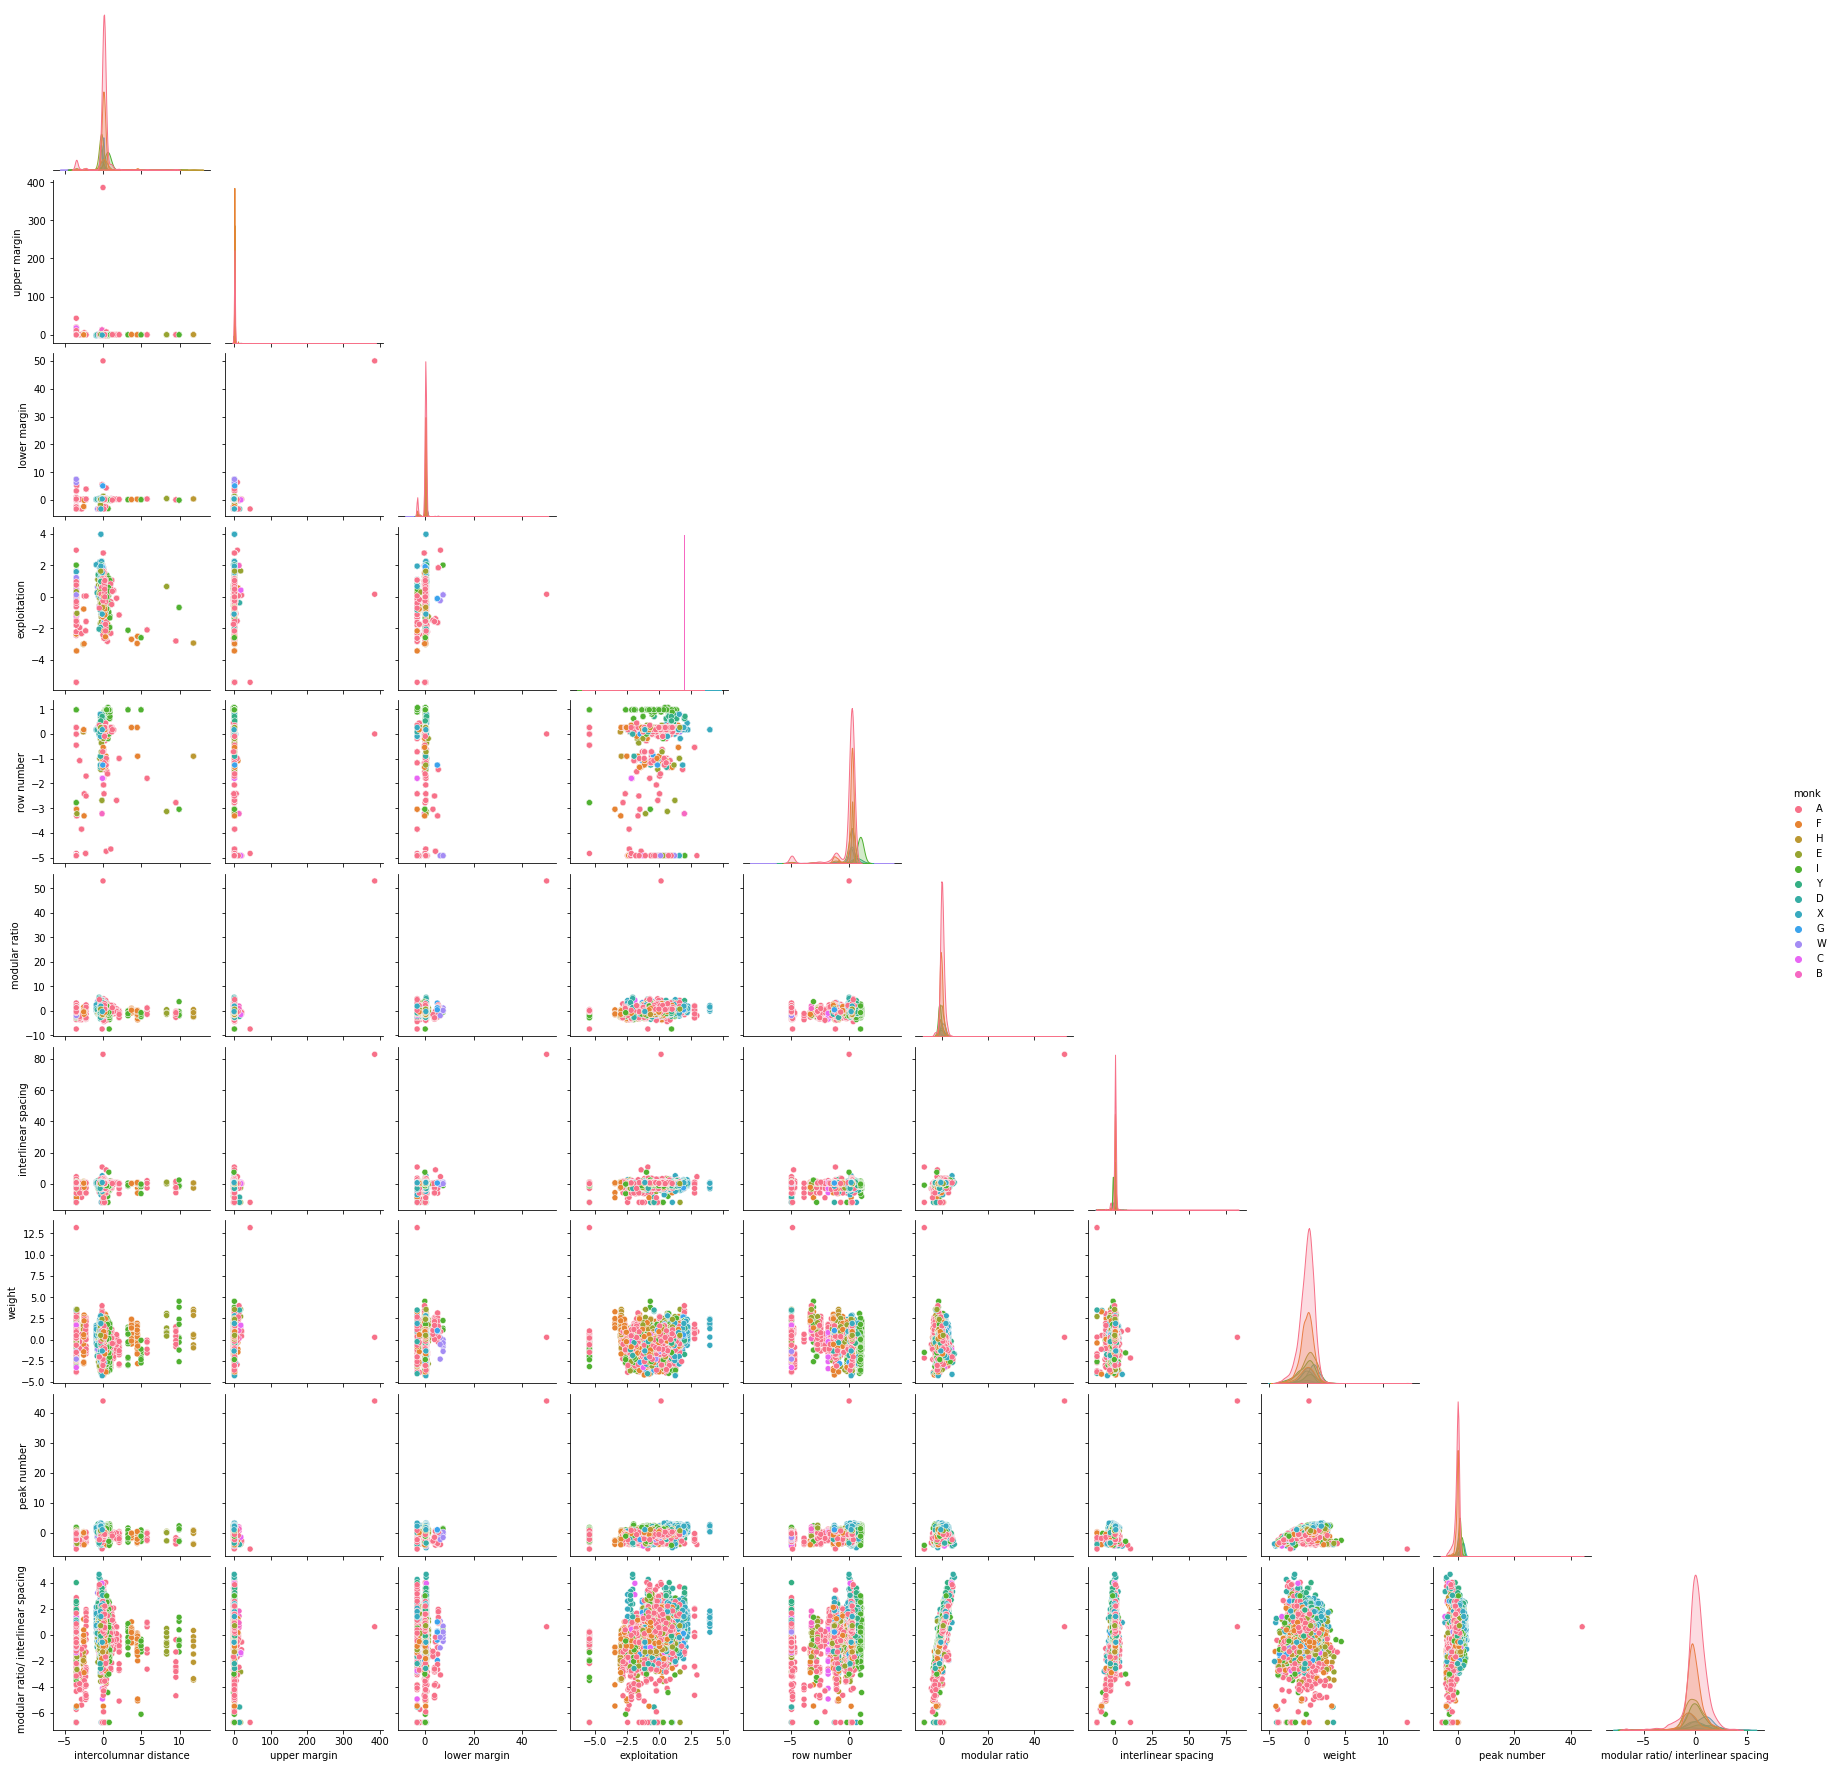

In [30]:
pplt = sns.pairplot(train, hue='monk', diag_kind='kde', corner=True);

This analysis of correlation between attributes is concluded by deleting the `modular ratio / interlinear` space from our dataset.

In [31]:
train = train.drop('modular ratio/ interlinear spacing', axis='columns')
test = test.drop('modular ratio/ interlinear spacing', axis='columns')

In [32]:
train.head(10)

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F
5,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,A
6,0.389513,-0.220579,-3.210528,-2.624155,0.261718,-0.764757,0.484429,-0.597510,-0.372457,A
7,0.019197,-0.040001,0.288973,-0.042597,0.261718,-1.013906,0.069175,0.890701,0.095265,F
8,0.500607,0.140576,0.388552,-0.637358,0.261718,-0.681707,0.295677,0.931046,0.500624,H
9,-0.252367,0.069915,0.246296,0.523550,0.261718,-1.221530,0.899684,1.373076,0.625350,E


We'll now observe the distribution of values for each attribute

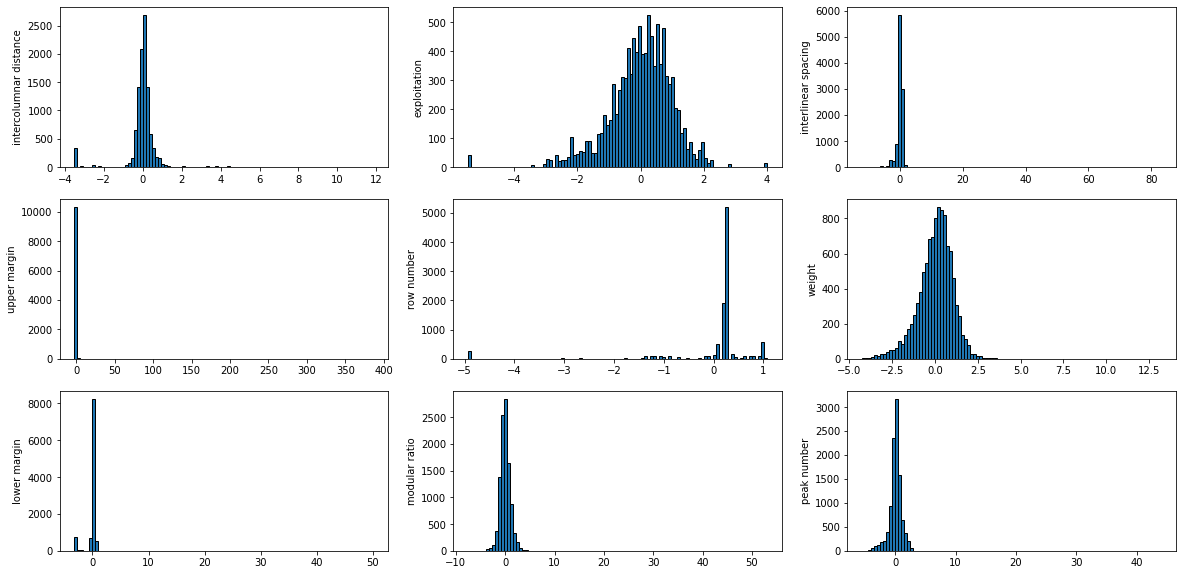

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10), squeeze=False)
for i, col in enumerate(train.columns[:-1]):
    train[col].plot.hist(bins = 100, edgecolor='k', ax=axes[i%3,i//3])
    axes[i%3,i//3].set_ylabel(col)
plt.show()

We can observe that some extreme values are present for almost all attributes

## Modeling

After our Data-visualization, it's time to do some modeling to predict results for the test set.

In [34]:
train_x = train.drop('monk', axis='columns')
train_y = train['monk']
test_x = test.drop('monk', axis='columns')
test_y = test['monk']

The dataset has already been normalized with the Z-Normalization method so there is no need to redo it.

In [35]:
def best_parameters(model, params, x_train, y_train):
    gridsearch = GridSearchCV(model, params, cv=5)
    gridsearch.fit(x_train, y_train)
    return gridsearch.best_estimator_, gridsearch.best_score_, gridsearch.best_params_

In [36]:
comparison = {'Model': [], 'Score': []}
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']

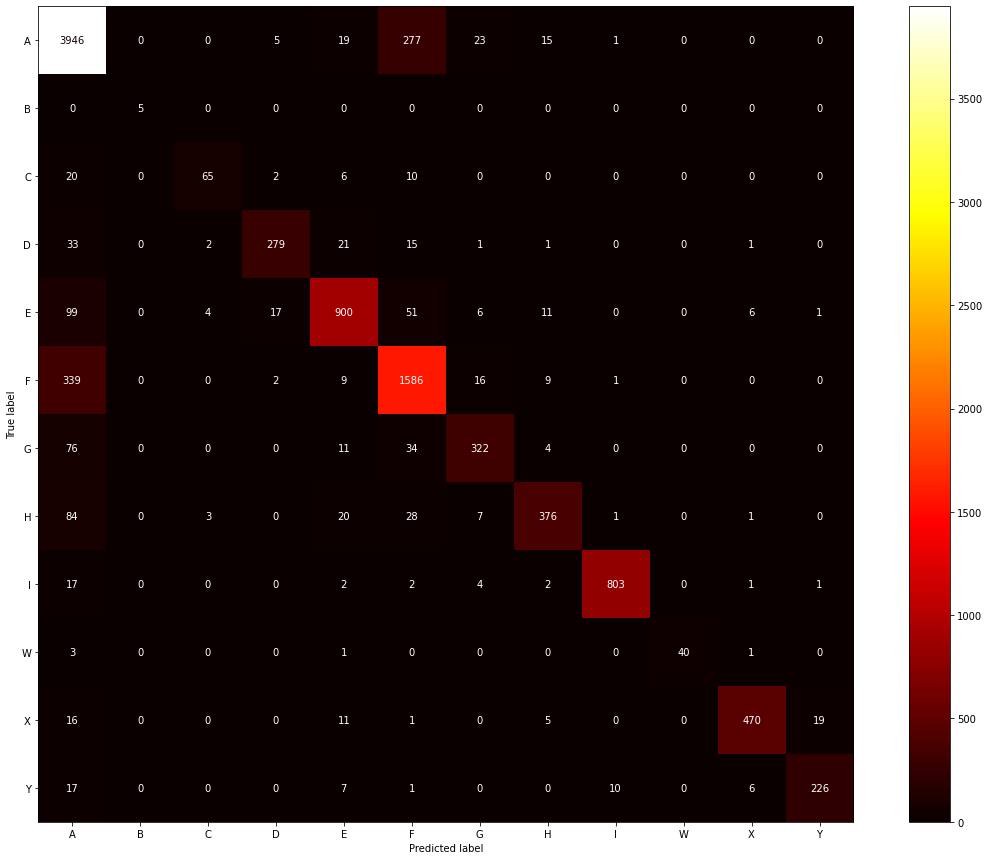

Best score obtained : 0.837967401725791
With these parameters : {'leaf_size': 15, 'n_neighbors': 5, 'p': 1}


In [37]:
parameters = {"n_neighbors": [5, 10, 12], "leaf_size": [15, 30, 45], "p": [1, 2]}
knn = KNeighborsClassifier()
estimator_knn, score_knn, params_knn = best_parameters(knn, parameters, train_x, train_y)

comparison['Model'].append('KNN')
comparison['Score'].append(score_knn)

fig, ax = plt.subplots(figsize=(20, 15))
ConfusionMatrixDisplay.from_estimator(estimator_knn, test_x, test_y, ax=ax, cmap='hot')
plt.show()

print(f'Best score obtained : {score_knn}\nWith these parameters : {params_knn}')

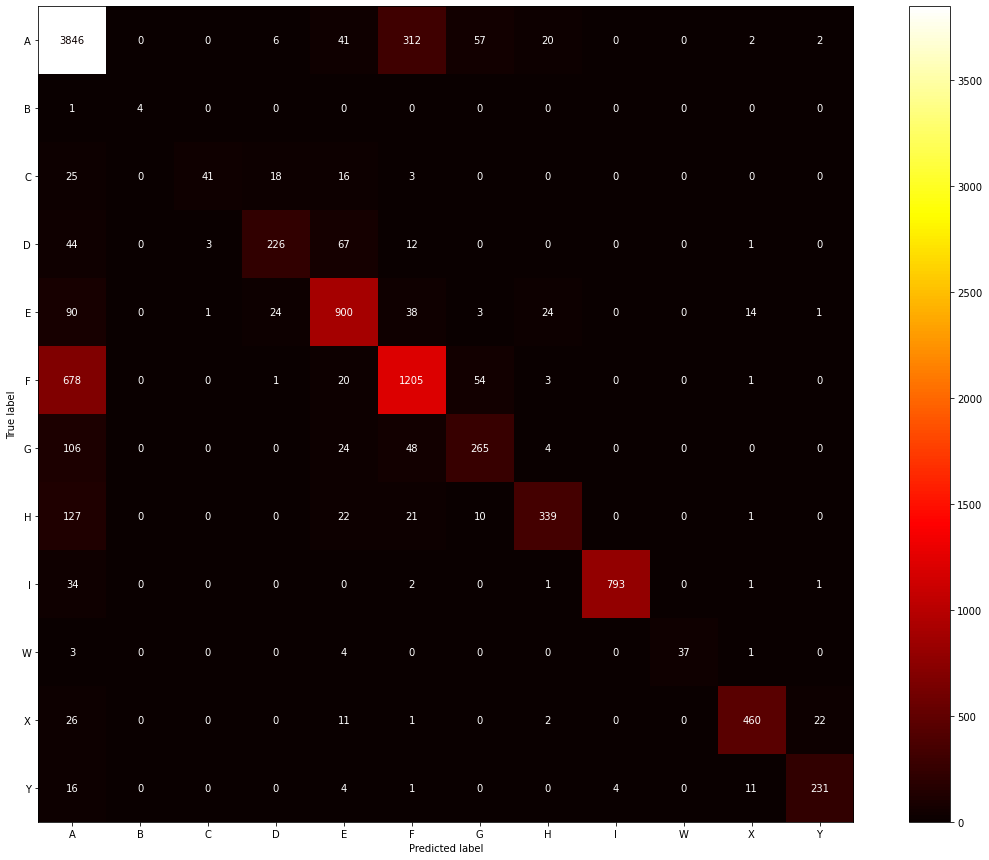

Best score obtained : 0.7885906040268457
With these parameters : {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}


In [38]:
parameters = {"gamma": [0.1, 0.5], "kernel": ['linear', 'rbf'], "C": [1, 2]}
svc = svm.SVC()
estimator_svc, score_svc, params_svc = best_parameters(svc, parameters, train_x, train_y)

comparison['Model'].append('SVC')
comparison['Score'].append(score_svc)

fig, ax = plt.subplots(figsize=(20, 15))
ConfusionMatrixDisplay.from_estimator(estimator_svc, test_x, test_y, ax=ax, cmap='hot')
plt.show()

print(f'Best score obtained : {score_svc}\nWith these parameters : {params_svc}')

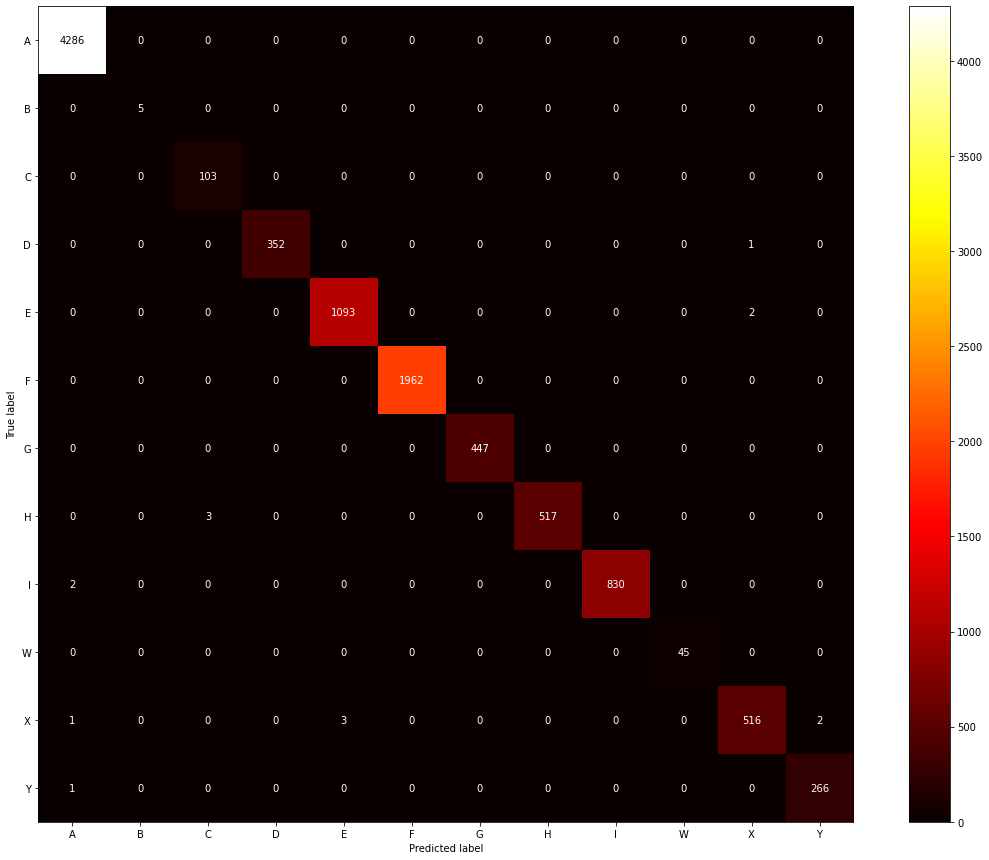

Best score obtained : 0.9963566634707574
With these parameters : {'learning_rate': 0.05, 'n_estimators': 1500}


In [39]:
import warnings
warnings.filterwarnings('ignore')

parameters = {"learning_rate": [0.05, 0.1], 'n_estimators': [1000, 1500]}
xgb = XGBClassifier(random_state=1, eval_metric='mlogloss')
estimator_xgb, score_xgb, params_xgb = best_parameters(xgb, parameters, train_x, train_y)

comparison['Model'].append('XGB Classifier')
comparison['Score'].append(score_xgb)

fig, ax = plt.subplots(figsize=(20, 15))
ConfusionMatrixDisplay.from_estimator(estimator_xgb, test_x, test_y, ax=ax, cmap='hot')
plt.show()

print(f'Best score obtained : {score_xgb}\nWith these parameters : {params_xgb}')

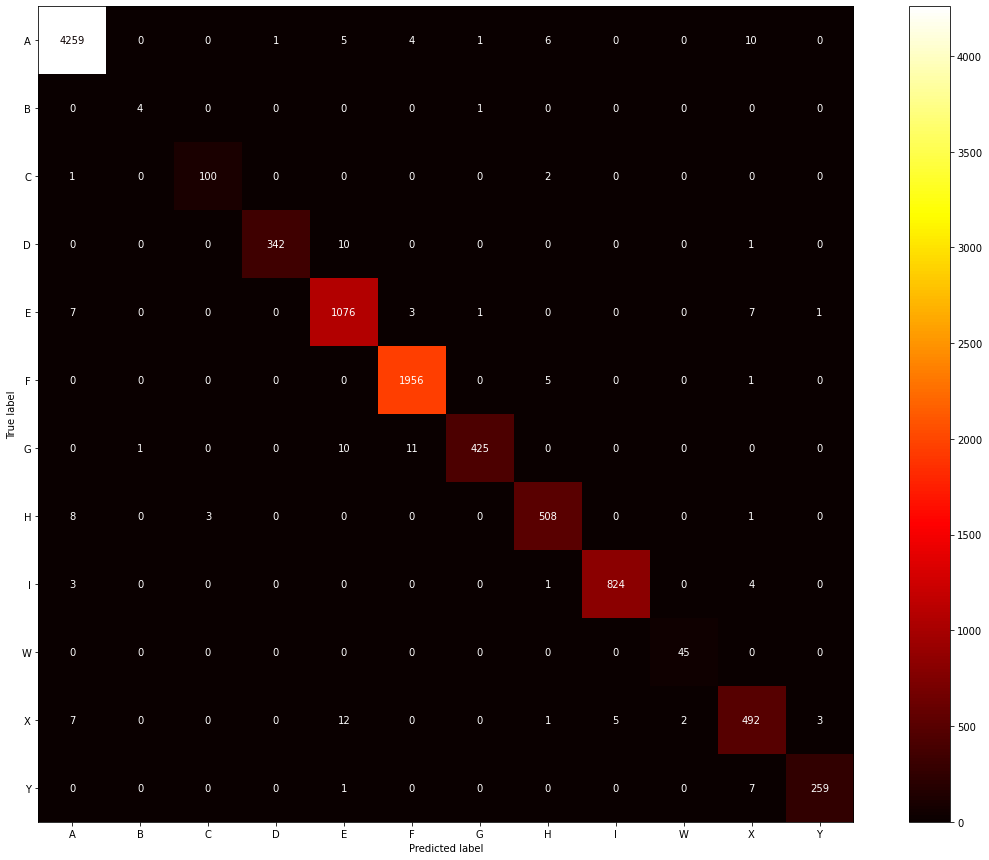

Best score obtained : 0.9829338446788111
With these parameters : {'criterion': 'entropy', 'max_features': 9}


In [40]:
parameters = {"criterion": ['gini', 'entropy'], "max_features": [3, 6, 9]}
dt = DecisionTreeClassifier()
estimator_dt, score_dt, params_dt = best_parameters(dt, parameters, train_x, train_y)

comparison['Model'].append('Decision Tree')
comparison['Score'].append(score_dt)

fig, ax = plt.subplots(figsize=(20, 15))
ConfusionMatrixDisplay.from_estimator(estimator_dt, test_x, test_y, ax=ax, cmap='hot')
plt.show()

print(f'Best score obtained : {score_dt}\nWith these parameters : {params_dt}')

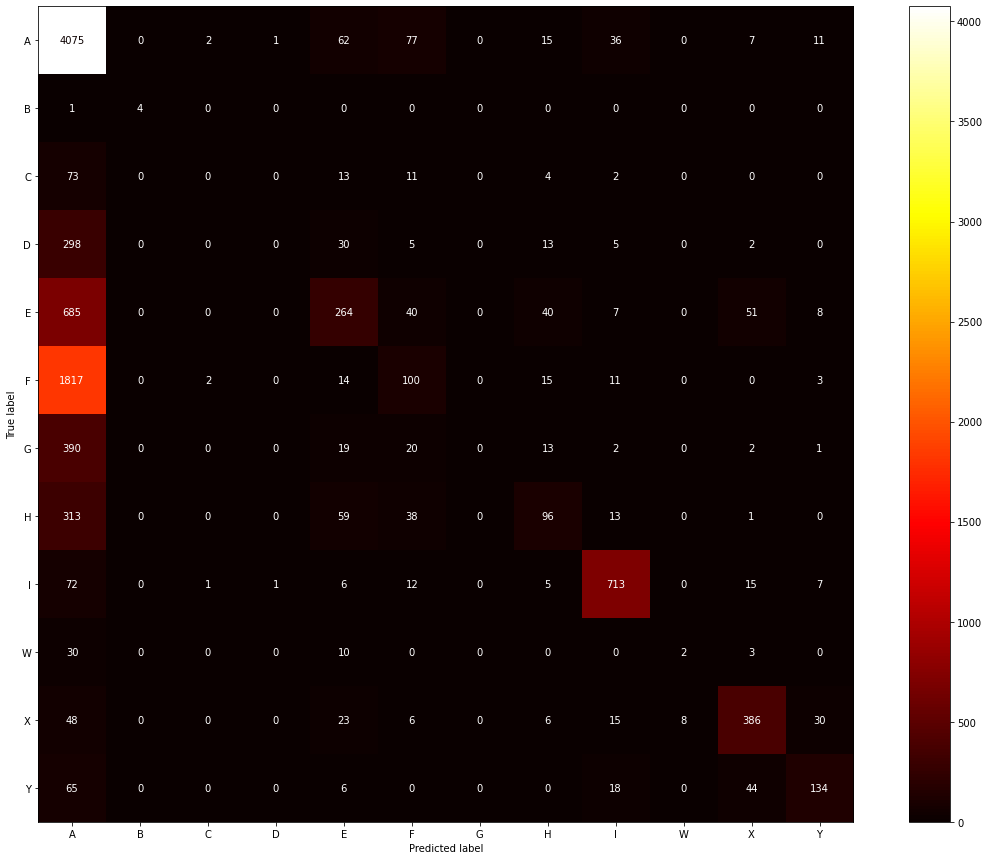

Best score obtained : 0.552732502396932
With these parameters : {'max_iter': 500, 'n_jobs': 2}


In [41]:
parameters = {"max_iter": [500, 750, 1000], "n_jobs": [2, 3]}
lr = linear_model.LogisticRegression()
estimator_lr, score_lr, params_lr = best_parameters(lr, parameters, train_x, train_y)

comparison['Model'].append('Logistic Regression')
comparison['Score'].append(score_lr)

fig, ax = plt.subplots(figsize=(20, 15))
ConfusionMatrixDisplay.from_estimator(estimator_lr, test_x, test_y, ax=ax, cmap='hot')
plt.show()

print(f'Best score obtained : {score_lr}\nWith these parameters : {params_lr}')

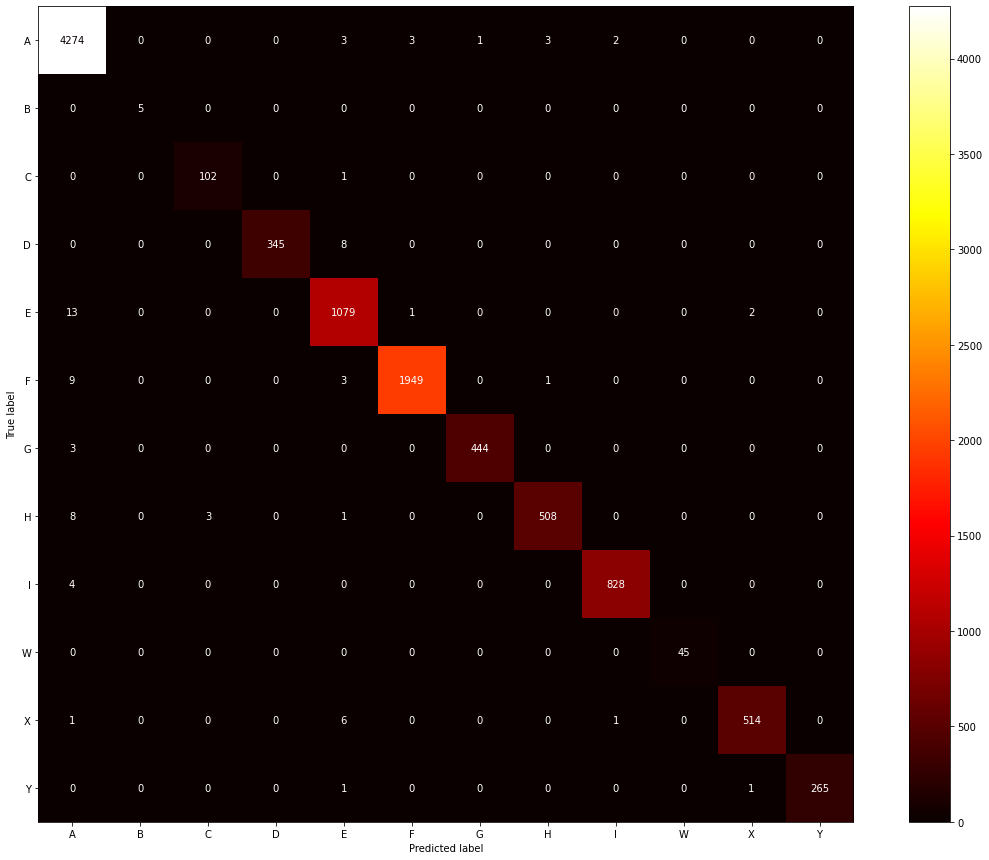

Best score obtained : 0.9888782358581016
With these parameters : {'min_samples_split': 2, 'n_estimators': 150}


In [42]:
parameters = {"n_estimators": [50, 100, 150, 200, 250, 300], "min_samples_split": [2, 3, 4, 5]}
rf = RandomForestClassifier(random_state = 1)
estimator_rf, score_rf, params_rf = best_parameters(rf, parameters, train_x, train_y)

comparison['Model'].append('Random Forest')
comparison['Score'].append(score_rf)

fig, ax = plt.subplots(figsize=(20, 15))
ConfusionMatrixDisplay.from_estimator(estimator_rf, test_x, test_y, ax=ax, cmap='hot')
plt.show()

print(f'Best score obtained : {score_rf}\nWith these parameters : {params_rf}')

In [43]:
compare = pd.DataFrame.from_dict(comparison)
compare.set_index('Model', inplace=True)
compare.sort_values(by='Score', ascending=False, inplace=True)
compare

,Score
Model,
XGB Classifier,0.996357
Random Forest,0.988878
Decision Tree,0.982934
KNN,0.837967
SVC,0.788591
Logistic Regression,0.552733


In [44]:
models = '\n\t-' + '\n\t-'.join(compare.index)
str_conclude = f'''For our comparison with these {len(compare)} models : {models}\nThe best model is {compare.index[0]} with a score of {compare.iloc[0][0]}'''
print(str_conclude)

For our comparison with these 6 models : 
	-XGB Classifier
	-Random Forest
	-Decision Tree
	-KNN
	-SVC
	-Logistic Regression
The best model is XGB Classifier with a score of 0.9963566634707574
